In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 108ms/step


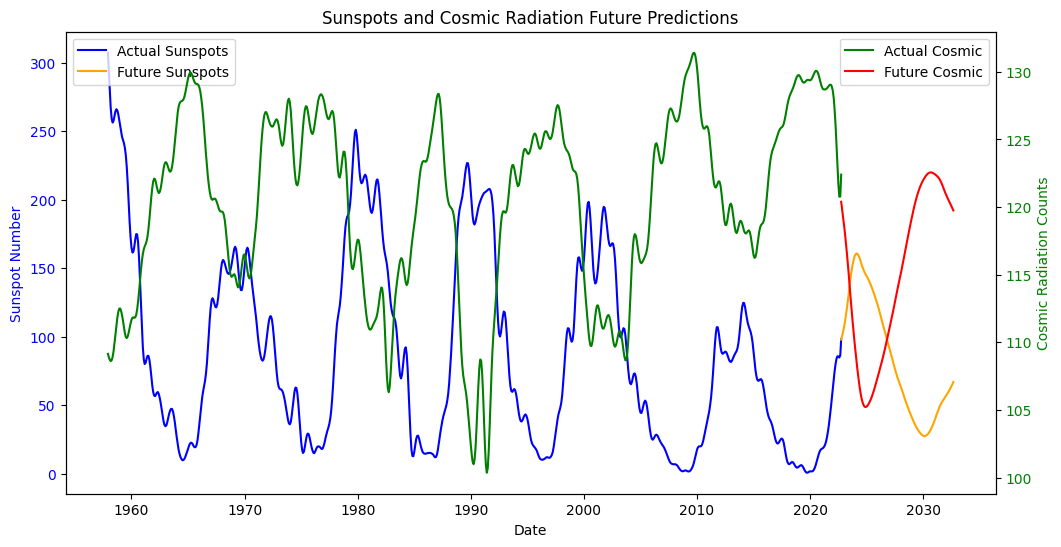

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed', 'THUL_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed', 'THUL_Smoothed']])

# Define the window size
window_size = 240


# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 2)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/model_1st_SolarAndCosmic.h5')


for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0])  # Append the predicted values to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, :] = prediction  # Update the last element with the predicted values

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions)  # Convert to numpy array
future_predictions = scaler.inverse_transform(future_predictions)

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')


# Plot actual data
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get the current axis

ax1.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual Sunspots', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sunspot Number', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary axis for THUL
ax2 = ax1.twinx()  # Create a twin of the current axis

ax2.plot(new_data['Date'], new_data['THUL_Smoothed'], label='Actual Cosmic', color='green')
ax2.set_ylabel('Cosmic Radiation Counts', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Plot future predictions
ax1.plot(future_dates, future_predictions[:,0], label='Future Sunspots', color='orange')
ax1.legend(loc='upper left')

# Plot future predictions
ax2.plot(future_dates, future_predictions[:,1], label='Future Cosmic', color='red')
ax2.legend(loc='upper right')

plt.title('Sunspots and Cosmic Radiation Future Predictions')
plt.show()


# bidirectional LSRM with 240 period

time_1_model = future_dates
actual_Sun_1_model = new_data['Sunspots_Smoothed']
actual_THUL_1_model = new_data['THUL_Smoothed']
prediction_Sun_1_model = future_predictions[:,0]
prediction_THUL_1_model = future_predictions[:,1]

1/1 [==============================] - 0s 79ms/step


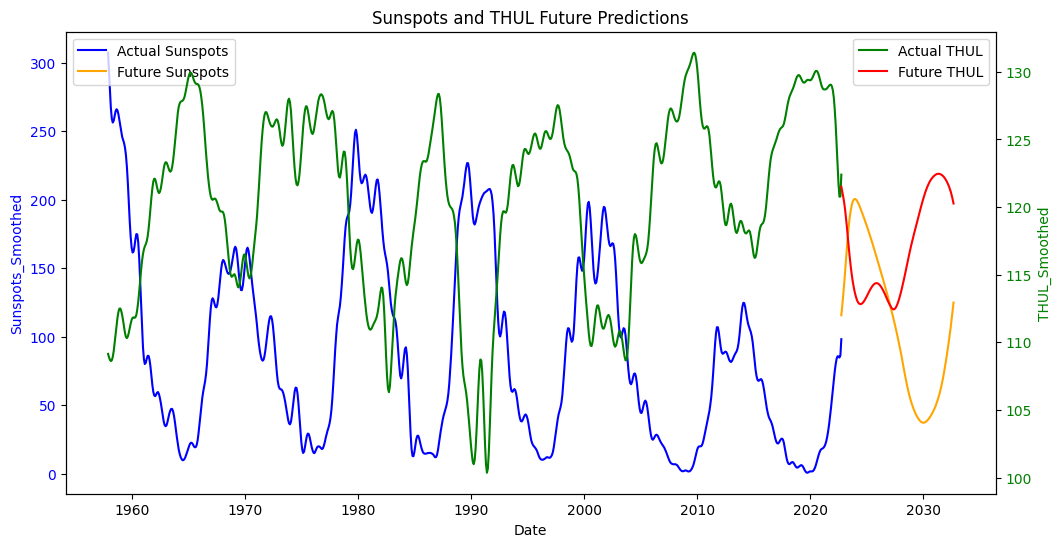

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed', 'THUL_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed', 'THUL_Smoothed']])

# Define the window size
window_size = 200


# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 2)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/model_2nd_SolarAndCosmic.h5')


for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0])  # Append the predicted values to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, :] = prediction  # Update the last element with the predicted values

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions)  # Convert to numpy array
future_predictions = scaler.inverse_transform(future_predictions)

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')


# Plot actual data
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get the current axis

ax1.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual Sunspots', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sunspots_Smoothed', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary axis for THUL
ax2 = ax1.twinx()  # Create a twin of the current axis

ax2.plot(new_data['Date'], new_data['THUL_Smoothed'], label='Actual THUL', color='green')
ax2.set_ylabel('THUL_Smoothed', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Plot future predictions
ax1.plot(future_dates, future_predictions[:,0], label='Future Sunspots', color='orange')
ax1.legend(loc='upper left')

# Plot future predictions
ax2.plot(future_dates, future_predictions[:,1], label='Future THUL', color='red')
ax2.legend(loc='upper right')

plt.title('Sunspots and THUL Future Predictions')
plt.show()


# bidirectional LSRM with 200 period

time_2_model = future_dates
actual_Sun_2_model = new_data['Sunspots_Smoothed']
actual_THUL_2_model = new_data['THUL_Smoothed']
prediction_Sun_2_model = future_predictions[:,0]
prediction_THUL_2_model = future_predictions[:,1]

1/1 [==============================] - 0s 106ms/step


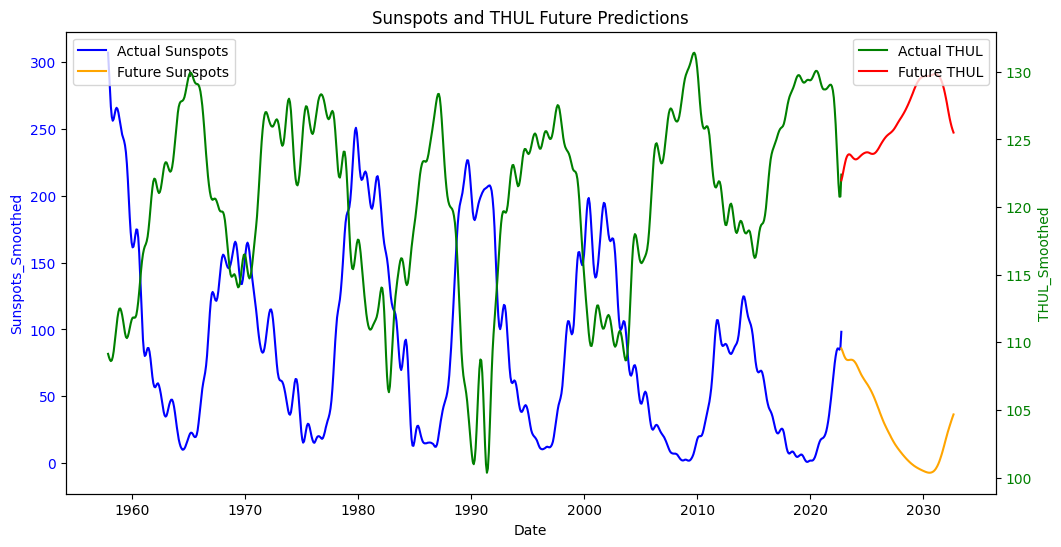

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed', 'THUL_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed', 'THUL_Smoothed']])

# Define the window size
window_size = 120


# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 2)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/model_3rd_SolarAndCosmic.h5')


for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0])  # Append the predicted values to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, :] = prediction  # Update the last element with the predicted values

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions)  # Convert to numpy array
future_predictions = scaler.inverse_transform(future_predictions)

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')


# Plot actual data
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get the current axis

ax1.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual Sunspots', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sunspots_Smoothed', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary axis for THUL
ax2 = ax1.twinx()  # Create a twin of the current axis

ax2.plot(new_data['Date'], new_data['THUL_Smoothed'], label='Actual THUL', color='green')
ax2.set_ylabel('THUL_Smoothed', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Plot future predictions
ax1.plot(future_dates, future_predictions[:,0], label='Future Sunspots', color='orange')
ax1.legend(loc='upper left')

# Plot future predictions
ax2.plot(future_dates, future_predictions[:,1], label='Future THUL', color='red')
ax2.legend(loc='upper right')

plt.title('Sunspots and THUL Future Predictions')
plt.show()


# bidirectional LSRM with 120 period

time_3_model = future_dates
actual_Sun_3_model = new_data['Sunspots_Smoothed']
actual_THUL_3_model = new_data['THUL_Smoothed']
prediction_Sun_3_model = future_predictions[:,0]
prediction_THUL_3_model = future_predictions[:,1]

1/1 [==============================] - 0s 101ms/step


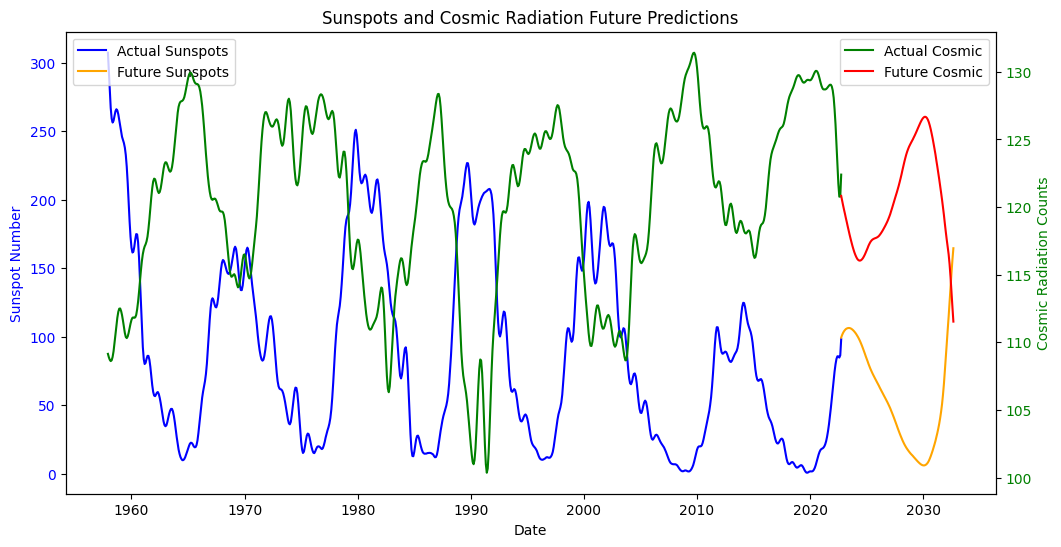

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed', 'THUL_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed', 'THUL_Smoothed']])

# Define the window size
window_size = 300


# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 2)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/model_4rth_SolarAndCosmic.h5')


for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0])  # Append the predicted values to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, :] = prediction  # Update the last element with the predicted values

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions)  # Convert to numpy array
future_predictions = scaler.inverse_transform(future_predictions)

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')


# Plot actual data
plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get the current axis

ax1.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual Sunspots', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sunspot Number', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary axis for THUL
ax2 = ax1.twinx()  # Create a twin of the current axis

ax2.plot(new_data['Date'], new_data['THUL_Smoothed'], label='Actual Cosmic', color='green')
ax2.set_ylabel('Cosmic Radiation Counts', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Plot future predictions
ax1.plot(future_dates, future_predictions[:,0], label='Future Sunspots', color='orange')
ax1.legend(loc='upper left')

# Plot future predictions
ax2.plot(future_dates, future_predictions[:,1], label='Future Cosmic', color='red')
ax2.legend(loc='upper right')

plt.title('Sunspots and Cosmic Radiation Future Predictions')
plt.show()


# bidirectional LSRM with 300 period

time_4_model = future_dates
actual_Sun_4_model = new_data['Sunspots_Smoothed']
actual_THUL_4_model = new_data['THUL_Smoothed']
prediction_Sun_4_model = future_predictions[:,0]
prediction_THUL_4_model = future_predictions[:,1]

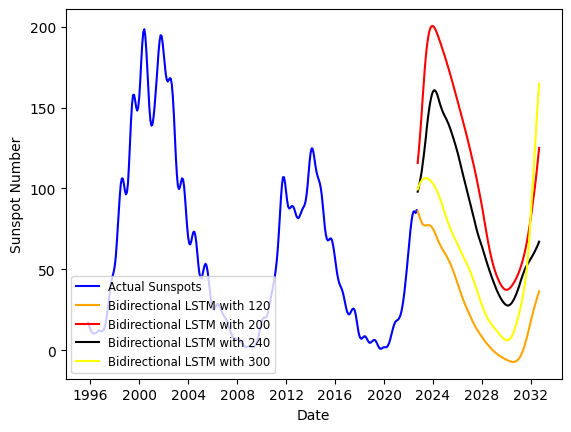

In [6]:
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['Sunspots_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(time_3_model, prediction_Sun_3_model, label='Bidirectional LSTM with 120', color='orange')
plt.plot(time_2_model, prediction_Sun_2_model, label='Bidirectional LSTM with 200', color='red')
plt.plot(time_1_model, prediction_Sun_1_model, label='Bidirectional LSTM with 240', color='black')
plt.plot(time_4_model, prediction_Sun_4_model, label='Bidirectional LSTM with 300', color='yellow')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend(fontsize='small', loc='lower left')
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/Multi-Method-Plot-SolarAndCosmic_Solar.png')

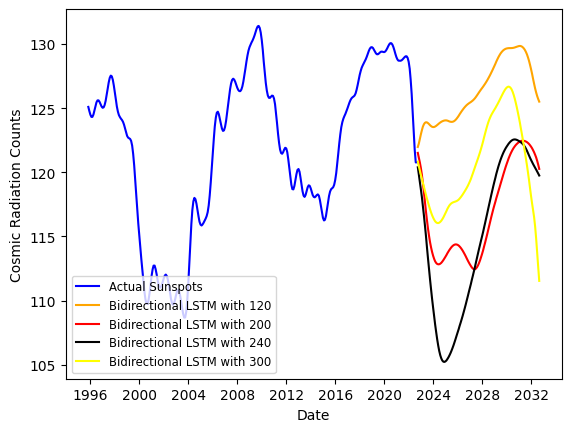

In [7]:
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['THUL_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(time_3_model, prediction_THUL_3_model, label='Bidirectional LSTM with 120', color='orange')
plt.plot(time_2_model, prediction_THUL_2_model, label='Bidirectional LSTM with 200', color='red')
plt.plot(time_1_model, prediction_THUL_1_model, label='Bidirectional LSTM with 240', color='black')
plt.plot(time_4_model, prediction_THUL_4_model, label='Bidirectional LSTM with 300', color='yellow')
plt.xlabel('Date')
plt.ylabel('Cosmic Radiation Counts')
plt.legend(fontsize='small',loc='lower left')
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/Multi-Method-Plot-SolarAndCosmic_Cosmic.png')

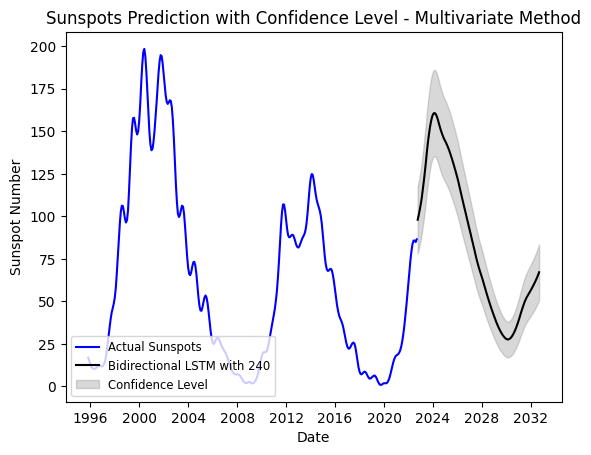

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for the first plot
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['Sunspots_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(time_1_model, prediction_Sun_1_model, label='Bidirectional LSTM with 240', color='black')

# Calculate the upper and lower bounds for the confidence level
confidence_upper = 2*np.sqrt(prediction_Sun_1_model)
confidence_lower = -2*np.sqrt(prediction_Sun_1_model)

# Plot the confidence level as an error bar using plt.fill_between
plt.fill_between(time_1_model, prediction_Sun_1_model + confidence_upper, prediction_Sun_1_model + confidence_lower, color='gray', alpha=0.3, label='Confidence Level')

# Add labels, legend, and other plot elements
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend(fontsize='small',loc='lower left')
plt.title('Sunspots Prediction with Confidence Level - Multivariate Method')
# Show the plot
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/Multi-Method-Plot-SolarAndCosmic_PREDICTION_Solar.png')

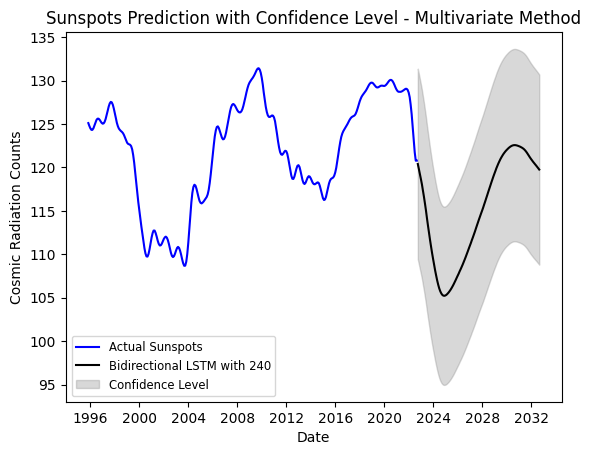

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for the first plot
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['THUL_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(time_1_model, prediction_THUL_1_model, label='Bidirectional LSTM with 240', color='black')

# Calculate the upper and lower bounds for the confidence level
confidence_upper = np.sqrt(prediction_THUL_1_model)
confidence_lower = -np.sqrt(prediction_THUL_1_model)

# Plot the confidence level as an error bar using plt.fill_between
plt.fill_between(time_1_model, prediction_THUL_1_model + confidence_upper, prediction_THUL_1_model + confidence_lower, color='gray', alpha=0.3, label='Confidence Level')

# Add labels, legend, and other plot elements
plt.xlabel('Date')
plt.ylabel('Cosmic Radiation Counts')
plt.legend(fontsize='small',loc='lower left')
plt.title('Sunspots Prediction with Confidence Level - Multivariate Method')
# Show the plot
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar+Cosmic/Multi-Method-Plot-SolarAndCosmic_PREDICTION_Cosmic.png')

In [ ]:
print("Month Of Solar maximum " ,time_1_model[list(prediction_Sun_1_model).index(max(list(prediction_Sun_1_model)))])

Month Of Solar maximum  2024-02-01 00:00:00


In [ ]:
print("Month Of Solar maximum " ,time_1_model[list(prediction_Sun_1_model).index(max(list(prediction_Sun_1_model)))])
print("Sunspots at maximum ", max(list(prediction_Sun_1_model)))
print('Duration of 25th Cycle', len(list(prediction_Sun_1_model))-20+10+12+12 , " months")

Month Of Solar maximum  2024-02-01 00:00:00
Sunspots at maximum  160.70686
Duration of 25th Cycle 134  months


In [ ]:
print("Month Of Solar maximum " ,time_2_model[list(prediction_Sun_2_model).index(max(list(prediction_Sun_2_model)))])
print("Sunspots at maximum ", max(list(prediction_Sun_2_model)))
print('Duration of 25th Cycle', len(list(prediction_Sun_2_model))-30+10+12+12 , " months")

Month Of Solar maximum  2023-12-01 00:00:00
Sunspots at maximum  200.48886
Duration of 25th Cycle 124  months


In [ ]:
print("Month Of Solar maximum " ,time_3_model[list(prediction_Sun_3_model).index(max(list(prediction_Sun_3_model)))])
print("Sunspots at maximum ", max(list(prediction_Sun_3_model)))
print('Duration of 25th Cycle', len(list(prediction_Sun_3_model))-26+10+12+12 , " months")

Month Of Solar maximum  2022-10-01 00:00:00
Sunspots at maximum  85.822525
Duration of 25th Cycle 128  months


In [ ]:
print("Month Of Solar maximum " ,time_4_model[list(prediction_Sun_4_model).index(max(list(prediction_Sun_4_model[0:25])))])
print("Sunspots at maximum ", max(list(prediction_Sun_4_model)))
print('Duration of 25th Cycle', len(list(prediction_Sun_4_model))-32+10+12+12 , " months")

Month Of Solar maximum  2023-06-01 00:00:00
Sunspots at maximum  164.58162
Duration of 25th Cycle 122  months


In [ ]:
prediction_Sun_4_model

array([ 99.41902  , 101.364365 , 102.87236  , 104.08728  , 104.978546 ,
       105.62472  , 106.05902  , 106.31876  , 106.41913  , 106.37008  ,
       106.12471  , 105.7267   , 105.19249  , 104.531944 , 103.76595  ,
       102.89     , 101.88311  , 100.795685 ,  99.612724 ,  98.28711  ,
        96.82068  ,  95.21761  ,  93.49053  ,  91.65544  ,  89.76218  ,
        87.824036 ,  85.84544  ,  83.93455  ,  82.05543  ,  80.19224  ,
        78.40783  ,  76.70254  ,  75.119865 ,  73.62274  ,  72.18116  ,
        70.81089  ,  69.46965  ,  68.15223  ,  66.84737  ,  65.53428  ,
        64.198296 ,  62.86442  ,  61.52554  ,  60.210964 ,  58.89952  ,
        57.581757 ,  56.254234 ,  54.93719  ,  53.623653 ,  52.28846  ,
        50.860973 ,  49.371586 ,  47.83128  ,  46.19533  ,  44.48236  ,
        42.749565 ,  40.93153  ,  39.076847 ,  37.17768  ,  35.235115 ,
        33.30403  ,  31.43158  ,  29.616497 ,  27.855572 ,  26.182186 ,
        24.575321 ,  23.0651   ,  21.675518 ,  20.395308 ,  19.2

In [ ]:
print("Month Of Solar maximum " ,time_1_model[list(prediction_THUL_1_model).index(min(list(prediction_THUL_1_model)))])

Month Of Solar maximum  2024-12-01 00:00:00


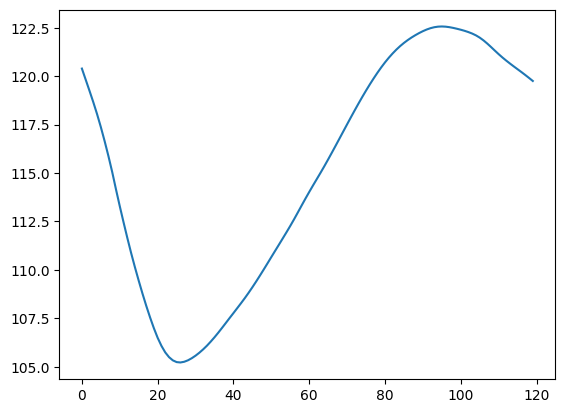

In [ ]:
plt.plot(prediction_THUL_1_model)